In [1]:
# Setr PYTHON PATH for JUPTERLAB to local env
import sys
sys.path.append("D://dev//devroot/RL-Intuition")
#sys.path.append("../..")

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import FormatStrFormatter
from src.tictactoe.q_val.q_vals_json import QValsJson

In [3]:
x = QValsJson.load_values_from_json("..//data/q_conv_e2bd781387bd40ef893bbb05a6084ed2.json")

In [4]:
cropped = list()
for a in x:
    if type(a) == list:
        cropped.append(a)
x = cropped

In [5]:
diff = np.zeros((len(x), len(x[0])-1))
j = 0
for a in x:
    if type(a) == type([]):
        for i in range(0, len(a)-1):
            diff[j][i] = abs(a[i+1] - a[i])
        j += 1


In [6]:
keep = np.zeros((len(x)))
threshold = 0.0001
i = 0
for d in diff:
    j = len(d)
    for v in reversed(d):
        if keep[i] == 0 and v > threshold:
            keep[i] = j
        j -= 1
    i += 1
print(keep)

[1.4727e+04 2.7520e+03 3.8900e+02 9.2000e+01 1.5000e+01 5.0000e+00
 5.0000e+00 3.8000e+01 1.0500e+02]


In [44]:
def plot_convergence(level, x1, ax1, ax1_color, x2, ax2, ax2_color):
    ax1.set_title("Level {}".format(level))
    ax1.set_xlabel('iteration')
    ax1.set_ylabel('Q Value', color=ax1_color)
    ax1.plot(x1, color=ax1_color)
    ax1.tick_params(axis='y', labelcolor=ax1_color)
    ax1.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

    ax2.set_ylabel('Q Diff', color=ax2_color)
    #ax2.xaxis.set_major_formatter(FormatStrFormatter('%.0f'))
    ax2.plot(x2, color=ax2_color)
    ax2.tick_params(axis='y', labelcolor=ax2_color)
    return

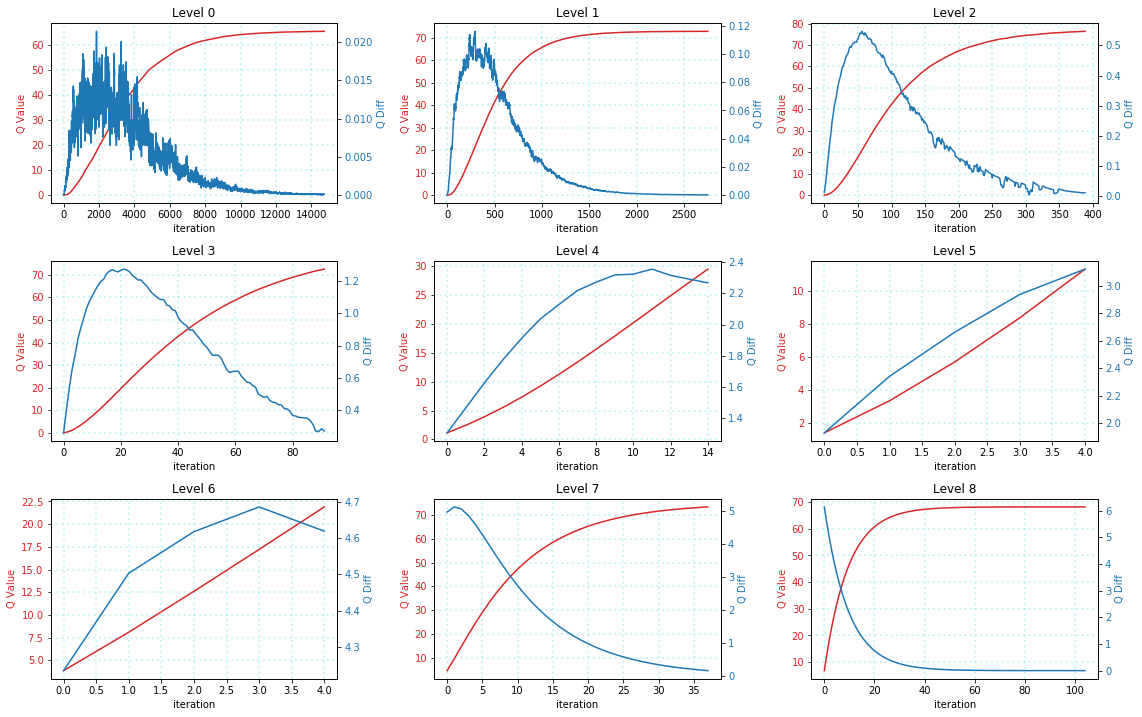

In [45]:
ax1_color = 'tab:red'
ax2_color = 'tab:blue'
k = 2000
plt.rcParams['figure.figsize'] = [40/2.54, 25/2.54]
fig, ax = plt.subplots(ncols=3, nrows=3, constrained_layout=True)
for i in range(3):
    for j in range(3):
        level = (3*i)+(j+1)-1
        plot_convergence(level,
                         x[level][:int(keep[level])], ax[i, j], ax1_color, 
                         diff[level][:int(keep[level])], ax[i, j].twinx(), ax2_color)
plt.show()